# Spam Detection Algorithm

# Requirements

To be able to run this Jupyter Notebook the following libraries should be downloaded.
-  __[Pandas](https://pandas.pydata.org/pandas-docs/stable/install.html)__
- __[NLTK](https://www.nltk.org/install.html)__
- __[WordCloud](https://pypi.org/project/wordcloud/)__
- __[MatPlotLib](https://pypi.org/project/matplotlib/)__ 
- __[Scipy](https://pypi.org/project/scipy/)__ 
- __[Numpy](https://pypi.org/project/numpy/)__ 
- __[Scikit Learn](https://pypi.org/project/scikit-learn/)__ 
- __[Plotly](https://pypi.org/project/plotly/)__ 
- __[TQDM ](https://pypi.org/project/tqdm/)__ 
- __[Pysparnn](https://github.com/facebookresearch/pysparnn)__ 

### Preparing Data

The emails are stored in a separate text file. I prefer to collect all emails under a pandas data frame called emails. In this table, each rows represents one email. It also has three columns which are email_subject, email_body and label. As the name suggests, the first column stores the subject of the email and the second column has the body of the emails. "Label" is a binary column. If Label is 1 and if it is 1, it means that it is a spam email else ham email.

While transferring all emails from text files to emails data frame, I remove \r\n characters symbolizing a new line which is unnecessary for the classification model. Also, all the punctuations are deleted.


In [1]:
import pandas as pd
import string
import os

"""
Set Data Paths
"""
data_path = "/Users/baturay/Google Drive/Data Mining/Project2-SpamDetection/data/"
spam_mail_path = data_path + "spam/"
ham_mail_path = data_path + "user" # user number need to be appanded such as user1 or user2
stream_path = data_path + "user1/stream/" # An example user path to classify stream mails

"""
Grab each spam files from path, remove punctuation, and insert it to pandas dataframe
"""
def txtFile2DataFrame(txtFilePath, dataFrame, label):
    exclude = set(string.punctuation)  # Create excluded punctuation chars
    for doc_name in os.listdir(txtFilePath):
        doc = open(txtFilePath + doc_name, "r").read() # Open and Read file
        cleaned_doc = ''.join(ch for ch in
                              doc if ch not in exclude) #  Remove punctuation marks from the playlist names
        email_subject = cleaned_doc.split('\r\n')[0] # Retrieve Subject
        email_body = cleaned_doc.replace(email_subject,'') # Delete subject from cleaned document obtain only email body
        email_body = email_body.replace('\r\n', ' ') # Delete \r\n chars
        dataFrame = dataFrame.append({"email_subject":email_subject, 'email_body': email_body, 'label': label},
                                     ignore_index=True)
    return dataFrame
"""
Create Data Frame that contains email bodies, subjects and labels 
Emails: All Spam E-Mails and Clean E-Mails of Users 1-10
Label = 1 : Spam
Label = 0 : Not Spam
"""
columns = ["email_subject", "email_body", "label"]
emails = pd.DataFrame(columns=columns)
emails = txtFile2DataFrame(spam_mail_path, emails, 1)
number_rows_first_10_user = 0
for userNo in range(1,21):
    user_ham_mail_path = ham_mail_path + str(userNo) + "/inbox/"
    emails = txtFile2DataFrame(user_ham_mail_path, emails, 0)
    if userNo == 10:
        number_rows_first_10_user = emails.shape[0]

#### Extract Features

Based on my observations, all forwarded emails are classified as ham, and none of the spam emails has "forwarded by" keyword. Therefore, I plan to create a new binary column called isForwarded to store forward status. Directly sent e-mails (isForwarded = 0) does not imply whether the mail is spam or not but if isForwarded is 1 then we know that it should be classified as ham because none of the spam emails has "forwarded by" keyword.

The reason why I specifically add this column and not let the classifier algorithm reveals this rule is that forwarded by keyword includes a stop word (by). All stop words will be removed at the following section, and for this reason the classifier may miss this rule. To guarantee to capture this rule, I plan to store it in a different column.

In [2]:
def appendIsForwarded(emails):
    if  'isForwarded' not in emails.columns: # If isForwarded column has already been added before dont add it again
        isForwarded = list()
        for i, column_terms in enumerate(emails["email_body"]):
            if "forwarded by" not in column_terms: 
                isForwarded.append(0)
            else:
                isForwarded.append(1)
        emails['isForwarded'] = isForwarded
        return emails
    return emails
emails = appendIsForwarded(emails)
emails

,email_subject,email_body,label,isForwarded
0,,,1,0
1,Subject you don t know how to get into search...,submitting your website in search engines may...,1,0
2,Subject sterling balance sheet strengthens und...,secured data inc scre emerging leader in c...,1,0
3,Subject stop s p a m in its tracks demodulate,hello this program worked for me if you hat...,1,0
4,Subject is that really you,hello paliourg sun 30 may 2004 09 44 32 ...,1,0
5,Subject re huge profit on e b a y,learn all the tips tricks and secret the pro...,1,0
6,Subject largest collection of dowlnoadable por...,we have the hottest pornostars pics and video...,1,0
7,Subject perfect logo charset koi 8 r,thinking of breathing new life into your busi...,1,0
8,Subject special report usa is giving away 50 ...,commonality ceramicbadinage conservatory rhap...,1,0
9,Subject peace tree designs creating extraordi...,peace tree design creates products to enhance...,1,0


# Data Cleaning and Preprocessing

## Data Cleaning

In this section, the stop words are eliminated from all the email bodies and headers. The words that have less than three chars are also removed. If the email has an empty header or an empty message, it may also have a meaning to classify. Therefore, the empty fields are replaced with ’$’ sign. From the word frequency visualization, it is observed that most of the empty subjects are classified as spam. In addition, I think that the number of numeric values may have extra information. For this reason, instead of removing numeric values, I replace them with ’###’ character. Because both spam and ham emails have a significant amount of numbers, I first run the classification model with ’###’ characters and it gives better results compared to the one in which the numbers are deleted. After this modifications, I saved the data frame as _emails

Also, I plan to detect misspelling words with a pre-trained spelling library. However, it was very slow and, it did not go over all the terms in the data frame in 4 hours. Note that it is still feasible to add misspelling word detection back if there is no running time constraint. The errors usually occur in the spam emails. Spam mail writers may intentionally write misspelled words to hack spam detection algorithms. Therefore, I plan to detect misspelling words.

In [3]:
from nltk.corpus import stopwords
def clean_column_terms(emails, column_name, isSubject):
    for i, column_terms in enumerate(emails[column_name]):
        terms = '' # Empty String
        _column_terms = column_terms.split(" ") # Split words from " " (white space) char 
        for term in _column_terms: 
            term = term.strip() # Trim words to remove white spaces from the begining and end
            if term.isdigit():
                term = "###" # If the term is digit change it with '###' char
                terms += term
                terms += ' '
            elif term.isalpha() and len(term) > 2 and term not in stopwords.words('english'): # If the word is not
                # an alphabetic char or has less than 3 or is a stop word then remove it
                terms += term
                terms += ' '
        terms = terms.strip() # Delete white space from the end
    
        if isSubject:
            terms = terms.partition(' ')[2] # delete "Subject" word from the beginnning
        if terms == '':
            terms = '$'
        emails.set_value(i, column_name, terms)  
    return emails

""" Preprocessed Emails"""
_emails = clean_column_terms(emails, "email_subject", True)
_emails = clean_column_terms(emails, "email_body", False)
_emails


,email_subject,email_body,label,isForwarded
0,$,$,1,0
1,know get search engine results,submitting website search engines may increase...,1,0
2,sterling balance sheet strengthens underpriced...,secured data inc scre emerging leader chinese ...,1,0
3,stop tracks demodulate,hello program worked hate like self try pro gr...,1,0
4,really,hello paliourg sun ### may ### ### ### ### ###...,1,0
5,huge profit,learn tips tricks secret pros use ecourse ebay...,1,0
6,largest collection dowlnoadable porn movies ###,hottest pornostars pics videos inside thousand...,1,0
7,perfect logo charset koi ###,thinking breathing new life business start rev...,1,0
8,special report usa giving away ### ### visas,commonality ceramicbadinage conservatory rhaps...,1,0
9,peace tree designs creating extraordinary art ...,peace tree design creates products enhance dai...,1,0


## Visualising Preprocessed Data

The most frequent terms are visualized. There is two class which are ham and spam emails. Also, each class has two fields called email body and subject. At this four figures, you can analyze which words are seen most common for each classes and fields.

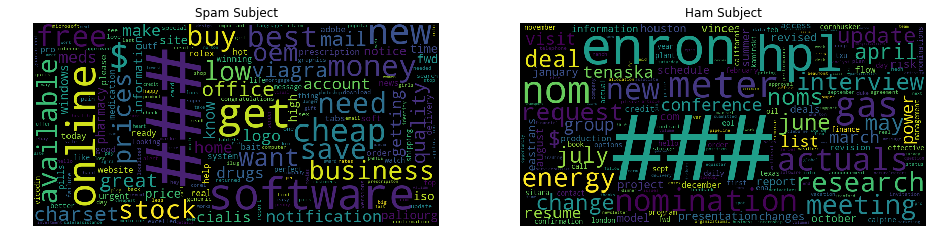

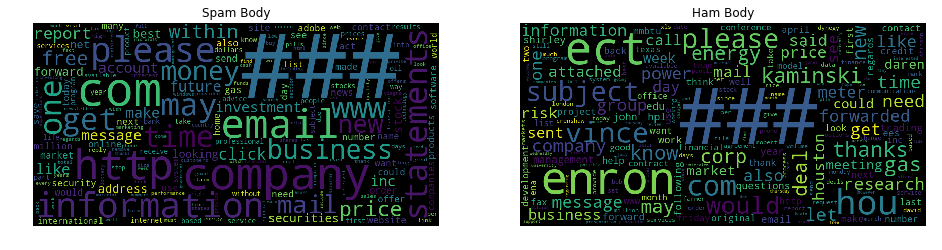

In [4]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import gridspec


def count_terms(emails, column_name, target):
    terms = list()
    emails = emails[emails.label == target]
    for i, column_terms in enumerate(emails[column_name]): 
        for term in column_terms.split(' '): 
            if term != '':
                terms.append(term) 
    count_dict = Counter(terms)
    return count_dict

""" Terms For Spam Emails"""
spam_subject_term_frequencies = count_terms(_emails, "email_subject", 1) # Count subject term frequencies
spam_body_term_frequencies =  count_terms(_emails, "email_body", 1) # Count body term frequencies

""" Terms For Ham Emails"""
ham_subject_term_frequencies =  count_terms(_emails, "email_subject", 0) # Count subject term frequencies
ham_body_term_frequencies = count_terms(_emails, "email_body", 0) # Count body term frequencies

fig = plt.figure(figsize=(16, 8))

# Spam Subject
a = fig.add_subplot(1, 2, 1)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(spam_subject_term_frequencies)
imgplot = plt.imshow(wordcloud)
plt.axis("off")
a.set_title('Spam Subject')

# Ham Subject
a = fig.add_subplot(1, 2, 2)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ham_subject_term_frequencies)
imgplot = plt.imshow(wordcloud)
imgplot.set_clim(0.0, 0.7)
plt.axis("off")
a.set_title('Ham Subject')

plt.show()

fig = plt.figure(figsize=(16, 8))

# Spam Body
a = fig.add_subplot(1, 2, 1)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(spam_body_term_frequencies)
imgplot = plt.imshow(wordcloud)
plt.axis("off")
a.set_title('Spam Body')

# Ham Body
a = fig.add_subplot(1, 2, 2)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ham_body_term_frequencies)
imgplot = plt.imshow(wordcloud)
imgplot.set_clim(0.0, 0.7)
plt.axis("off")
a.set_title('Ham Body')

plt.show()

"""NOT RELEVANT - CREATE BUTTON TO HIDE THE CODE """
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<style>
input[type=button], input[type=submit], input[type=reset] {
    background-color: #4CAF50;
    border: none;
    color: white;
    padding: 16px 32px;
    text-decoration: none;
    margin: 4px 2px;
    cursor: pointer;
</style>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Creating Classification Model

To classify texts, before implementing any machine learning algorithms we need to indicate our cost function to evaluate our model. The problem that we work is slightly different than other classification problems because we need to customize our scoring function.

After building scoring function, I create a frequency table for each term to analyze it with the classifiers. Lastly, I start implementing machine learning algorithms to classify emails by using frequency data.

## Generating Cost Function
    

The main objective of this project is to classify ham emails as accurate as possible and minimize the total cost of mistakenly classified emails. The manager of the company warns that classifying a ham email as spam requires 0.5h of work. Because average hourly cost of employees is 40 e, this classification costs 40 e * 0.5h = 20 e. If the analytics team classifies an ham email as suspicious, then it costs 5 e. On the other hand, classifying a spam email as suspicious or ham costs 0.4 e. Below there is a visualization of the costs to better understand regarding modeling perspective. After summing up all the costs, I divide it to the total number of emails to find the average cost of classification algorithm per e-mail.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;margin:0px auto;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
@media screen and (max-width: 767px) {.tg {width: auto !important;}.tg col {width: auto !important;}.tg-wrap {overflow-x: auto;-webkit-overflow-scrolling: touch;margin: auto 0px;}}</style>
<div class="tg-wrap"><table class="tg">
  <tr>
    <th class="tg-9hbo"><br></th>
    <th class="tg-9hbo">Actual Ham</th>
    <th class="tg-9hbo">Actual Spam</th>
  </tr>
  <tr>
    <td class="tg-9hbo">Predicted Ham</td>
    <td class="tg-yw4l">0</td>
    <td class="tg-yw4l">0.4</td>
  </tr>
  <tr>
    <td class="tg-9hbo">Predicted Spam</td>
    <td class="tg-yw4l">20</td>
    <td class="tg-yw4l">0</td>
  </tr>
  <tr>
    <td class="tg-9hbo">Predicted Suspicious</td>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">0.4</td>
  </tr>
</table></div>

In [5]:
def calculateTotalCost(actual, predictions,):
    """
        args: 
            predictions : The result of array of prediction model
            actual : The actual results array 
            
            predictions[i] = 0 (Ham)
            predictions[i] = 1 (Spam) 
            Predictions[i] = 2 (Suspicious)

            actual[i] = 0 (Ham)
            actual[i] = 1 (Spam)
    """
    n_predictions = len(predictions)
    assert len(predictions) == len(actual), "Predicted and actual arrays must be at the same size!"
    
    i = 0
    totalCost = 0
    for prediction in predictions:
        cost = 0
        if (predictions[i] == 0 or predictions[i] == 2) and actual[i] == 1:
            cost = 0.4
        
        elif predictions[i] == 1 and actual[i] == 0:
            cost = 20
        
        elif predictions[i] == 2 and actual[i] == 0:
            cost = 5
            
        totalCost += cost
        i += 1
    return totalCost / float(len(predictions))

## Generating Sparse Frequency Matrix

To train classification algorithm, my strategy is to generate a frequency matrix for both subject and body columns of _emails data frame where there are terms at the columns, document ids at the rows and term frequencies at the matrix values. The idea is to train classifiers with this frequency matrix.

This dense matrix, however, has some problems regarding memory because it is highly sparse. Suppose there are 3000 different terms in total at the email_body column and the first email ID has Hello Baturay body message. In this case, only the Hello and Baturay columns will have values other than 0 and all the other 2998 columns will be 0. This situation is highly undesirable and it occupies a significant amount of memory. We only need to keep the values more than 0 for each row. Numpy library offers a good solution for this scenario and it is possible to create a very efficient sparse matrix with this library. The encouraging part is many classification algorithms also accept this sparse matrix as a train data. Therefore, we do not need to keep dense matrix. Thanks to sparse matrix implementation, both memory consumption significantly decrease and the machine learning algorithms run faster.

For the values of the matrix, I tried different scenarios such as Term Frequency (TF), term frequency-inverse document frequency (TF-IDF) and Term Counts. Within three different ways, TF performs better.

Also, we know that the length of the e-mails varies a lot. There may be some e-mails with only one sentence or 500 sentences. TF can handle this high variance. It counts each terms occurring in an email field (subject or body) and, it divides the counted value to the total length of email field. It helps to handle changing length of the emails. Suppose Hello term occurs twice in document A and it has 4 terms in total. Also, document B has three Hello terms and it has 9 terms. In this case, document A will have 0.5 scores for Hello term while document B has 0.3. So, the machine learning algorithm will give more importance to document A.

In [6]:
from scipy.sparse import csr_matrix
from collections import Counter
import numpy as np
def createCSRmatrix(docs):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for doc in docs:
        doc = doc.split(' ')  # Split words with " "(white space) sep 
        doc_dict = Counter(doc) # Find frequency of each terms
        total_n_terms = sum(doc_dict.itervalues(), 0.0) # Find total number of terms in each documents
        TF_dict = {key: value / total_n_terms for key, value in doc_dict.iteritems()} # TF = frequency / total number of words
        for key, value in TF_dict.iteritems():
            index = vocabulary.setdefault(key, len(vocabulary))
            indices.append(index)
            data.append(value)
        indptr.append(len(indices))
    sparse_data = csr_matrix((data, indices, indptr))  
    return sparse_data, vocabulary

def append_csr_matrix(sparse_data,docs,vocabulary):
    data = sparse_data.data.tolist()
    indices = sparse_data.indices.tolist()
    indptr = sparse_data.indptr.tolist()
    for doc in docs:
        words = doc.split(' ')
        word_count_dict = Counter(words)
        total_n_terms = sum(word_count_dict.itervalues(), 0.0) # Find total number of terms in each documents
        TF_dict = {key: value / total_n_terms for key, value in word_count_dict.iteritems()} # TF = frequency / total number of words
        counter = 0
        for key, value in TF_dict.iteritems():   
            if key in vocabulary:
                counter += 1
                data.append(value)
                indices.append(vocabulary[key])
        last_element_ptr = indptr[-1]
        indptr.append(last_element_ptr + counter)
    number_of_docs = len(docs)
    sparse_data = csr_matrix((data, indices, indptr))[-number_of_docs:] # Take only the last added rows   
    return sparse_data

sparse_email_subjects, vocabulary_subject = createCSRmatrix(_emails["email_subject"])
sparse_email_body, vocabulary_body = createCSRmatrix(_emails["email_body"])

## Creating Naive Bayes Classification Model

Naive Bayes is a probabilistic classifier. It is a simple, easy to understand and fast algorithm commonly used in text classification. Another big advantage is that python scikit-learn implementation supports to work with sparse data that we create and it is very efficient compared to a dense matrix.

In our data, the values are "discrete" and not binary. For this reason, I prefer to use Multinomial Naive Bayes implementation. In addition, we know that the distribution of target variable is not homogeneous because the number of spam emails is higher than ham emails. Therefore, I used stratified k-fold cross-validation to validate the model and to prevent over-fitting. Stratified k-fold keeps the percentage of samples for spam and ham stable. At the beginning of the model, I hold the default values and, I do not play with the Naive Bayes parameters.

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

def visualize_naive_bayes_scores(costs_test, costs_train, x_axis_indexes, title):
    trace0 = go.Box(
    y=costs_test,
    x=x_axis_indexes,
    name='Test Set Error',
    marker=dict(
        color='#3D9970'
    )
    )
    trace1 = go.Box(
        y=costs_train,
        x=x_axis_indexes,
        name='Train Set Error',
        marker=dict(
            color='#FF4136'
        )
    )
    data = [trace0, trace1]
    layout = go.Layout(
        title=title,
        yaxis=dict(
            title='Average Cost',
            zeroline=False
        ),
        xaxis=dict(
            title='Number of Folds',
            zeroline=False
        ),
        boxmode='group'
    )
    fig = go.Figure(data=data, layout=layout)
    return fig
    
def naive_bayes_method(X,y,random_states,n_splits):
    n_rows = number_rows_first_10_user
    costs_test = list()
    costs_train = list()
    x_axis_indexes = list()
    probs_df = pd.DataFrame(columns=['Index','Ham_Prob','Spam_Prob','Actual_Class']) 
    confusion_matrix_train = np.zeros([2,2]) # Create empty 2x2 0 matrix to calculate confusion matrix
    confusion_matrix_test = np.zeros([2,2])  # Create empty 2x2 0 matrix to calculate confusion matrix
    for n_split in n_splits:
        for random_state in random_states:
            skf = StratifiedKFold(n_splits= n_split, shuffle=True, random_state=random_state)
            for train_index, test_index in skf.split(X, y):
                X_train, X_test = X[train_index], X[test_index] # Split train and test data independent variables
                y_train, y_test = y[train_index], y[test_index] # Split train and test data dependent variables
                
                multinomialNB = MultinomialNB(alpha = 0.001) # Generate Multinomial Naive Bayes Class
                multinomialNB.fit(X_train, y_train) # Fit Train data into Naive Bayes model
                
                prediction_test = multinomialNB.predict(X_test) # Predict test set
                prediction_train = multinomialNB.predict(X_train) # Predict train set
                
                prediction_test_proba = multinomialNB.predict_proba(X_test) # Predict test set probabilities
                weighted_average_proba = np.concatenate((np.asarray([test_index]).T, prediction_test_proba), axis=1)
                weighted_average_proba = np.concatenate((weighted_average_proba, np.asarray([y_test]).T), axis=1)
                temp_df = pd.DataFrame(weighted_average_proba.tolist(), columns=['Index','Ham_Prob','Spam_Prob','Actual_Class'])
                probs_df = probs_df.append(temp_df)
                
                
                costs_test.append(calculateTotalCost(y_test, prediction_test)) # Save test set prediction score for each fold
                costs_train.append(calculateTotalCost(y_train, prediction_train)) # Save train set prediction score for each fold
   
                x_axis_indexes.append(str(n_split)) # Keep track of n_splits to plot
    probs_df = probs_df.sort_values('Index') # Sort Values Based on Index 
    minCost = 100
    best_i = 0
    conf_matrix_preds = list()
    actual_class = list()
    for i in range(0,11):
        i *= 0.1        
        probs_df['Prediction'] = np.where(probs_df['Ham_Prob'] <= probs_df['Spam_Prob'] - i, 1, 0)   
        totalCost = calculateTotalCost(probs_df['Actual_Class'].tolist()[0:n_rows], probs_df['Prediction'].tolist()[0:n_rows]) # Calculate total costs for only first 10 user
        if totalCost < minCost:
            conf_matrix_preds = probs_df['Prediction'].tolist()[0:n_rows] # Only include first 10 user 
            actual_class = probs_df['Actual_Class'].tolist()[0:n_rows] # Only include first 10 user 
            minCost = totalCost
            best_i = i
    confusion_matrix_test = confusion_matrix(conf_matrix_preds, actual_class, labels=[0,1]) # Add each folds confusion matrix    
                
    return costs_test, costs_train, x_axis_indexes, confusion_matrix_test, minCost, best_i

## Optimizing K for Stratified K-Fold Cross Validation

Finding more accurate results requires having a near optimal K value for the stratified k-fold cross-validation. We know that if k increases bias decrease but variation increase and if k decreases variation decrease but bias decrease. An ideal K should try to keep both variation and bias lower.

To find an ideal K parameter, I run Naive Bayes algorithm for both subjects and body attributes separately with different K values from 2 to 20. Note that random states are set to a static number for reproducibility purpose. For each k value, the algorithm runs 6 times with different random states. This process repeats for each k value. The errors of each fold for all random states are calculated with our custom cost function and saved into an array. After calculating error for each K values, the error arrays are plotted with a box plot to observe the variance. As we see from the k-fold graphs for both subject and body attributes, when k fold increases the variance also increases. Error for test set is higher for the very low k values. After 9 fold it is minimized and the train error does not decrease significantly. Therefore, it is reasonable to use 9 fold cross validation for both email and subject attributes.

#### Visualize K-Fold Errors for Email Subject Attribute

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import numpy as np


X = sparse_email_subjects
y = np.array(_emails['label'].tolist())
n_splits = range(2,20)
random_states = [10,20,30,40,50,61]
title = "Test and Train Set Errors for E-Mail Subject Field"
costs_test, costs_train, x_axis_indexes,_,minCost, best_i = naive_bayes_method(X,y,random_states,n_splits)
fig1 = visualize_naive_bayes_scores(costs_test, costs_train, x_axis_indexes, title)
py.iplot(fig1, filename='errors')




#### Visualize K-Fold Errors for Email Body Field

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import numpy as np

X = sparse_email_body
y = np.array(_emails['label'].tolist())
n_splits = range(2,20)
random_states = [10,20,30,40,50,61]
title = "Test and Train Set Errors for E-Mail Body Field"
costs_test, costs_train, x_axis_indexes,_,minCost, best_i = naive_bayes_method(X,y,random_states,n_splits)
fig = visualize_naive_bayes_scores(costs_test, costs_train, x_axis_indexes, title)
py.iplot(fig, filename='errors')

### Confusion Matrix of E-mail Subjects and Body for 9 Fold

After finding near-optimal K parameter for K-Fold cross-validation, I plot the confusion matrix to observe the accuracy of classifications for both subject and body attributes. The confusion matrix is seen below. Clearly, we see that classifying only with body outperforms classification with subjects attribute. For the simplicity, I did not include the suspicious class at the early stages. For now, only spam or ham classification is performed.

For this case, accuracy is not that important because there is a significant cost difference between predicting ham email as spam and predicting spam email as ham. The former is 50 times more costly than the latter. Therefore, the purpose is to minimize the amount of
misclassified ham email as spam.

By default, if P(Spam) > P(Ham) then Naive Bayes algorithm classify that email as Spam
or vice versa. However, we should classify an email as Spam only if it is most likely to be a spam. To define "most likely" term, I add a variable that creates a bias to compare P(Spam) and P(Ham). New equation turns out to be P(Spam) > P(Ham)−i ∗0.1 where i is an integer changing from 0 to 10.

The Naive Bayes algorithm calculates the total cost for each i value and it returns the best i parameter that creates the lowest score. For the estimations using body attribute, the best i is 0.4. It means that if P(Spam) = 0.8 and P(Ham) = 0.2 then it will be classified as Spam because P(Spam)−P(Ham)>0.4. On the other hand for the subject attribute, the best i is 0.8.

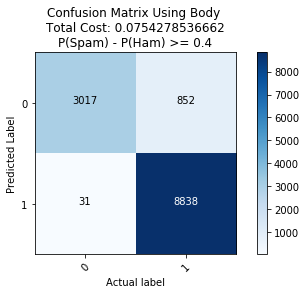

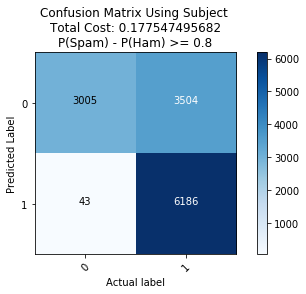

In [11]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted Label')
    plt.xlabel('Actual label')

n_splits =[9]
random_states = [61]
classes = [0,1]

X = sparse_email_body
y = np.array(_emails['label'].tolist())
costs_test, costs_train, x_axis_indexes, confusion_matrix_test_body,minCost, best_i = naive_bayes_method(X,y,random_states,n_splits)
plt.figure()
plot_confusion_matrix(confusion_matrix_test_body.astype(long), classes = classes, title='Confusion Matrix Using Body \nTotal Cost: ' 
                      +str (minCost) + '\nP(Spam) - P(Ham) >= ' + str(best_i))


X = sparse_email_subjects
y = np.array(_emails['label'].tolist())
costs_test, costs_train, x_axis_indexes,confusion_matrix_test_subject,minCost, best_i = naive_bayes_method(X,y,random_states,n_splits)
plt.figure()
plot_confusion_matrix(confusion_matrix_test_subject.astype(long), classes = classes, title='Confusion Matrix Using Subject \nTotal Cost: ' 
                      +str (minCost) + '\nP(Spam) - P(Ham) >= ' + str(best_i))
plt.show()

### Combining E-mail Subjects and Body Field 

Only using subject attribute costs us 0.177 e and using body generates 0.075 e in average per e-mail. In this case, we have two different classifiers and two different P(Ham) or P(Spam) probabilities for each emails. To decrease total cost, I plan to combine these two subject and body attributes.

My strategy was to take the weighted average of P(Spam) for both attributes. Because using Email Body attribute performs much better than Email Subject, giving higher weight to Email Body may seem reasonable. I test the weights with grid search and I create the following equation. P(SpamAverage)=P(SpamBody)∗i∗0.1+P(SpamSubject)∗(1−i)∗0.1 where i is an integer between 0 and 10. After running this equation 11 times for each i values, the best weights were 0.8 for Email Body and 0.2 for Email Subject. The results are expected because Email Body performs better than Email Subject attribute. The promising part is the average cost per email prediction decreases from 0.075 e to 0.069 e thanks to this combination.

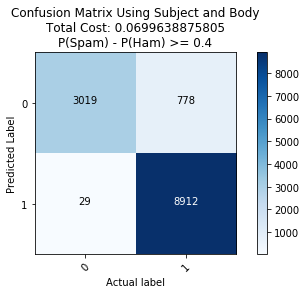

If spam probability - ham probability >= 0.4 classify the mail as 1 or Spam
The weighted average coef of email body is 0.8
The weighted average coef of email subject is 0.2
Average Cost per e-mail without classifying suspicious email: 0.0699638875805


In [12]:
from sklearn.metrics import confusion_matrix
def naive_bayes_feature_combination(X_body, X_subject, y, random_state, n_splits, gap): 
    n_rows = number_rows_first_10_user
    skf = StratifiedKFold(n_splits= n_splits, shuffle=True, random_state=random_state)
    probs_df = pd.DataFrame(columns=['Index','Ham_Prob','Spam_Prob','Actual_Class']) 
    for train_index, test_index in skf.split(X_body, y):
        y_train, y_test = y[train_index], y[test_index] # Split train and test data dependent variables

        """ Split Email Body Field"""
        X_body_train, X_body_test = X_body[train_index], X_body[test_index] # Split train and test data independent variables
        multinomialNB = MultinomialNB(alpha = 0.001) # Generate Multinomial Naive Bayes Class
        multinomialNB.fit(X_body_train, y_train) # Fit Train data into Naive Bayes model      
        test_body_proba = multinomialNB.predict_proba(X_body_test) # Predict test set class probabilities for body field
        
        """ Split Email Subject Field"""
        X_subject_train, X_subject_test = X_subject[train_index], X_subject[test_index] # Split train and test data independent variables              
        multinomialNB = MultinomialNB(alpha = 0.001) # Generate Multinomial Naive Bayes Class
        multinomialNB.fit(X_subject_train, y_train) # Fit Train data into Naive Bayes model      
        test_subject_proba = multinomialNB.predict_proba(X_subject_test) # Predict test set class probabilities for body field
        
        """ Calculate Weighted Average of Features"""
        weighted_average_proba = (test_body_proba * gap) + (test_subject_proba * (1-gap))
        weighted_average_proba = np.concatenate((np.asarray([test_index]).T, weighted_average_proba), axis=1)
        weighted_average_proba = np.concatenate((weighted_average_proba, np.asarray([y_test]).T), axis=1)
        temp_df = pd.DataFrame(weighted_average_proba.tolist(), columns=['Index','Ham_Prob','Spam_Prob','Actual_Class'])
        probs_df = probs_df.append(temp_df)
    
    """ Find Minimum Cost by Creating Bias for Probabilities"""
    probs_df = probs_df.sort_values('Index') # Sort Values Based on Index 
    minCost = 100
    best_i = 0
    conf_matrix_preds = list()
    actual_class = list()
    for i in range(0,11):
        i *= 0.1        
        probs_df['Prediction'] = np.where(probs_df['Ham_Prob'] <= probs_df['Spam_Prob'] - i, 1, 0)   
        totalCost = calculateTotalCost(probs_df['Actual_Class'].tolist()[0:n_rows], probs_df['Prediction'].tolist()[0:n_rows])
        if totalCost < minCost:
            conf_matrix_preds = probs_df['Prediction'].tolist()
            actual_class = probs_df['Actual_Class'].tolist()
            minCost = totalCost
            best_i = i
    return best_i, minCost, probs_df['Spam_Prob'].tolist(), conf_matrix_preds, actual_class
        
X_subject = sparse_email_subjects
X_body = sparse_email_body
y = np.array(_emails['label'].tolist())
n_splits = 9
random_state = 61
minCost = 100
index = 0
n_rows = number_rows_first_10_user
naive_bayes_spam_prediction_probs = list()
conf_matrix_preds_1 = list()
_confusion_matrix = list()
for gap in range(0,11): # Grid search to find near optimal weighted average of "Body" and "Subject" classifier predictions
    best_i, cost, spam_prediction_probs,conf_matrix_preds_2, actual_class = naive_bayes_feature_combination(X_body,
                                                                 X_subject, y,random_state, n_splits,0.1*gap)
    if cost < minCost:
        minCost = cost
        index = gap
        naive_bayes_spam_prediction_probs = spam_prediction_probs
        conf_matrix_preds_1 = conf_matrix_preds_2

_confusion_matrix = confusion_matrix(conf_matrix_preds_1[0:n_rows], actual_class[0:n_rows], labels=[0,1]) # Add each folds confusion matrix    
plt.figure()
plot_confusion_matrix(_confusion_matrix.astype(long), classes = classes, title='Confusion Matrix Using Subject and Body\nTotal Cost: ' 
                     +str (minCost) + '\nP(Spam) - P(Ham) >= ' + str(best_i))
plt.show()
_emails['Naive Bayes Predictions'] = naive_bayes_spam_prediction_probs
print('If spam probability - ham probability >= ' + str(best_i) + ' classify the mail as 1 or Spam')
print('The weighted average coef of email body is ' + str(0.1*index) +'\nThe weighted average coef of email subject is '+ str(1-(0.1*index)))
print('Average Cost per e-mail without classifying suspicious email: ' + str(minCost))

## Approximate Nearest Neighbor Search with Cos Similarity

After obtaining predictions from Naive Bayes algorithm, I also want to observe the similarities between emails to increase prediction quality further and decrease total average cost. Because the lengths of emails vary a lot, I prefer to use cosine similarity as a distance measure to check the similarities. The idea is to find nearest 13 email body and subject based on cosine distance, ranking them with Borda Count Algorithm and predict P(Spam) based on this ranking.

To implement the idea, I prefer to use one of the fastest Approximate Nearest Neighbor Search implementation called PySparNN. It finds the specified number of neighbors for a given vector. In this case, the algorithm tries to find 13 nearest neighbors at maximum. If the cosine of neighbor vector and original vector is more than 0.92, then it will not count as a neighbor because the similarity is not that significant. Note that the neighbor vector that has the lowest score is the nearest neighbor.

In spam detection algorithm, I make an approximate nearest neighbor search for both subject and body fields separately. It means that I find at most 13 neighbors for the subject and 13 neighbors for body field. After, I combine all neighbors to calculate the probability of being a spam. I prefer to use Borda count to be able to give more ranking to the closest neighbors. Note that for each neighbor, we know its cosine similarity with the original vector and its target value (1 for spam and 0 for ham). After we combine subject and body neighbors for each email, I sort the neighbors cosine similarity in increasing order. Then, I give N points to the closest neighbor, N-1 to the second closest, N-2 to the third and by applying the same rule the farthest neighbor has 1 point. N is a total number of neighbors excluding the neighbors that has more than 0.92 cosine distance. After calculating points, I sum the points of spam emails and divide it to the total sum of all points to find the P(Spam). Refer to Table 2 to better understand Borda Count ranking. At that table, all the neighbors are sorted based on cosine distance and the ranking points are given based on this sort. For this case P(Spam) is calculated as (5+4)/(7+6+5+4+3+2+1)=0.32

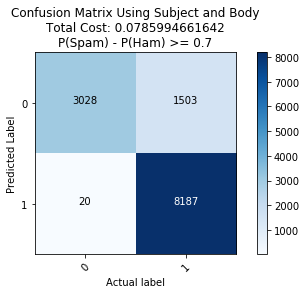

In [41]:
import pysparnn.cluster_index as ci
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
def knn_approx_search(subject_data, body_data, output_identifiers, search_data_subject = None, search_data_body = None):
    def search(data, search_data = None):
        tv = TfidfVectorizer() # Create Tfidf Vectorizer
        tv.fit(data)

        features_vec = tv.transform(data)
        # build the search index!
        
        cp = ci.MultiClusterIndex(features_vec, output_identifiers)
        if search_data_subject is None or search_data_body is None:
            search = cp.search(features_vec, k=13, k_clusters=2, return_distance=True)
        else:
            search_features_vec = tv.transform(search_data)
            search = cp.search(search_features_vec, k=13, k_clusters=2, return_distance=True)
        return search
    
    if search_data_subject is None : 
        subject_search = search(subject_data)
        body_search = search(body_data)
    else: 
        subject_search = search(subject_data, search_data_subject)
        body_search = search(body_data, search_data_body)
    
    """ Combining both subject and body search results """
    combined_subject_body_search = list()
    index = 0 
    for subject_nn in subject_search:
        temp = list()
        temp = body_search[index] + subject_nn
        combined_subject_body_search.append(temp)
        index += 1
        
    document_prob_scores_1 = list()
    for documents in combined_subject_body_search:
        temp_similar_docs = list()
        for document in documents:    
            cos_sim = float(document[0])
            if cos_sim > 0.000001 and cos_sim < 0.92:
                temp_similar_docs.append(document)
        """ Implement Borda Count To Find Spam Probability"""
        temp_similar_docs = [[float(similar_doc[0]),int(similar_doc[1][0])] for similar_doc in temp_similar_docs] # Cast cos scores to float
        temp_similar_docs =  pd.DataFrame(temp_similar_docs , columns=['CosSimilarity', 'IsSpam']) # Create a data frame from similar documents
        temp_similar_docs = temp_similar_docs.sort_values('CosSimilarity', ascending=1) # Sort in increasing order 
        points = [point for point in range(temp_similar_docs.shape[0],0,-1)] # Give points from n to 0 where n is the total number of similar docs. Give n point to most similar and n-1 to second most similar and give 1 point to the last similar
        temp_similar_docs['points'] = points # add points to temp data frame
        all_points_sum = temp_similar_docs['points'].sum() # Sum all points
        spam_points = temp_similar_docs[temp_similar_docs.IsSpam == 1] # Filter spam emails
        spam_points_sum = spam_points.points.sum() # Find total points of spam emails 
        if all_points_sum > 2:
            spam_probability = float(spam_points_sum) / all_points_sum # Find P(Spam)
        else:
            spam_probability = -1 # If there are less than 3 similar docs then set probability to -1
        document_prob_scores_1.append(spam_probability) # Append all P(Spam) for each document
    return document_prob_scores_1 

subject_data = _emails['email_subject']
body_data = _emails['email_body']
output_identifiers = _emails['label'].map(str) + '-' + _emails['email_subject']
knn_approx_search_predictions = knn_approx_search(subject_data, body_data, output_identifiers)
_emails['KNN Search Predictions'] = knn_approx_search_predictions

""" Visualizing The Confusion Matrix of PySparNN """
n_rows = number_rows_first_10_user
minCost = 100
best_i = 0
conf_matrix_preds = list()
actual_class = list()
for i in range(0,11):
    i *= 0.1 
    _knn_approx_search_predictions = [1 if item > i else 0 for item in knn_approx_search_predictions ]
    totalCost = calculateTotalCost(_emails['label'].tolist()[0:n_rows], _knn_approx_search_predictions[0:n_rows]) # Calculate total costs for only first 10 user
    if totalCost < minCost:
        conf_matrix_preds = _knn_approx_search_predictions[0:n_rows] # Only include first 10 user 
        actual_class = _emails['label'].tolist()[0:n_rows] # Only include first 10 user 
        minCost = totalCost
        best_i = i
_confusion_matrix = confusion_matrix(conf_matrix_preds, actual_class, labels=[0,1]) # Add each folds confusion matrix      
plt.figure()
plot_confusion_matrix(_confusion_matrix.astype(long), classes = [0,1], title='Confusion Matrix Using Subject and Body\nTotal Cost: ' 
                     +str (minCost) + '\nP(Spam) - P(Ham) >= ' + str(best_i))
plt.show()


## Combining Naive Bayes and Approximate Nearest Neighbor Search Results

In this step, we have two prediction results coming from Naive Bayes and Approximate Nearest Neighbor Search algorithms. We need to combine the predictions of this two algorithms to give final classification decision.

To give the final decision, we have three important scenarios that indicate our classification strategy

1. Email is forwarded: P(Spam)=0
2. Approximate Nearest Neighbor Search finds less than 3 neighbors that satisfy our distance constraint: P(Spam) = Naive Bayes Prediction
3. Else: P(Spam) = i * 0.05 Naive Bayes Prediction + (1-i) * 0.05 * Approximate Nearest Neighbor Search Prediction where i is an integer changes from 0 to 20

The first two criteria are straightforward. For the third one, I apply grid search for all pos- sible i values. Total prediction cost is calculated for each i value and the least cost determines the best i value. Thanks to this strategy, we can combine the predictions of two different algorithms.

Before this step, we did not include the suspicious class for the simplicity. Our data does not have a suspicious class. We, therefore, cannot train our algorithms to detect suspicious e-mails. What we can do is that we can classify emails as suspicious if P(Spam) > P1 and P(Spam) ≤ P2. In this case, we need to optimize two parameters P1 and P2 to minimize the average total cost per email. The constraints for P1 and P2 are 0 ≤ P 1 ≤ P 2 ≤ 1. By using mixed integer programming, we can find the optimal exact values of P1 and P2. For simplicity, I prefer to use grid search. By satisfying the constraints, I increment P1 and/or P2 by 0.025 until reaching 1. For this settings, the best cost is generated when P 1 = P 2 = 0.725. It means that classifying as suspicious increase our costs. The model does not choose to classify mails as suspicious.

100%|██████████| 20/20 [03:34<00:00, 10.74s/it]


0.725
0.725
0.55
The total with suspicious class: 0.0486104569006


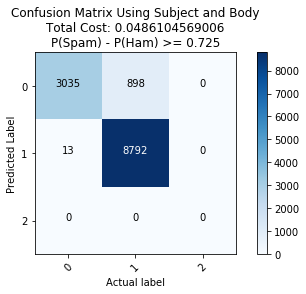

In [56]:
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

naive_bayes_preds = _emails['Naive Bayes Predictions'].tolist()
knn_search_preds = _emails['KNN Search Predictions'].tolist()
actual_labels = _emails['label'].tolist()
isForwarded = _emails['isForwarded'].tolist()
n_rows = number_rows_first_10_user
grid_search_params = [x * 0.05 for x in range(0, 20)]
minCost = 100
for i in tqdm(grid_search_params):
    combination_probs = list() # Weighted average of Naive Bayes and Approximate Nearest Neighbor Search predictions
    for row_i in range(0,n_rows):
        if isForwarded[row_i] == 1:
            combination_probs.append(0) # If a mail is forwarded than it cannot be a spam because none of the spam emails 
            # is forwarded by someone.
        elif knn_search_preds[row_i] != -1:
            weighted_average = i * naive_bayes_preds[row_i] + (1-i) * knn_search_preds[row_i] 
            combination_probs.append(weighted_average)
        elif knn_search_preds[row_i] == -1:
            combination_probs.append(naive_bayes_preds[row_i])
        else:
            print("Something Goes Wrong!")
    
    for grid_search_param1 in range(0, 40):
        for grid_search_param2 in range(grid_search_param1, 41):
            grid_search_param1 *= 0.025
            grid_search_param2 *= 0.025
            _combination_probs = np.asarray(combination_probs)
            _combination_probs = np.where(_combination_probs > grid_search_param2, 1, 
                  (np.where(_combination_probs <= grid_search_param1, 0, 2))).tolist()
            total_cost = calculateTotalCost(actual_labels[0:n_rows], _combination_probs )
            if total_cost < minCost:
                minCost = total_cost
                best_i = i
                best_combination_probs = _combination_probs
                best_param1 = grid_search_param1
                best_param2 = grid_search_param2

print(best_param1)
print(best_param2)
print(best_i)
print("The total with suspicious class: " + str(minCost))
plt.figure()
_confusion_matrix = confusion_matrix(best_combination_probs, actual_labels[0:n_rows], labels=[0,1,2])
classes = [0,1,2]
plot_confusion_matrix(_confusion_matrix.astype(long), classes = classes, title='Confusion Matrix Using Subject and Body\nTotal Cost: ' 
                     +str (minCost) + '\nP(Spam) - P(Ham) >= ' + str(best_param1))
plt.show()


# EVALUATING THE PERFORMANCE OF THE MODEL

To apply this algorithm in real life, we need to know the ratio of spam emails and all the emails in an email stream. After improving the spam detection algorithm, the best average cost per email is found as 0.048 euro. If we do not use this algorithm and suppose all the emails in an email stream is spam, then the average cost per e-mail would be 0.4 euro. If we use this algorithm, it saves money if the incoming spam emails ratio is more than 0.048/0.4 = 12%. If it is less than this amount the algorithm should not be used.

This model also has some weaknesses. Users from 11 to 20 included into train data as ham emails. However, approximately 5% of this emails are spam emails but, these emails are given to the train data as ham emails. At the very beginning, I do not plan to include Users 11 to 20. My plan was to train machine learning algorithms with the first 10 users and then try to predict the rest of the users to classify their inbox as spam or ham to find the hidden 5% spam emails. After finding spam and ham emails, I would expand my train data with the "classified" Users 11 to 20 data. The problem was the error of the model was not even close to 5%. Therefore instead of trying to classify those inbox, I directly included into training data as ham email.

## Classifying An Email Stream

After calculating near optimal parameters for the models such as indicating weights to combine predictions of the two different algorithms or probability thresholds to decrease the average total cost per email, the model is now ready to classify an email stream.

In [53]:
def spam_detection_algorithm(sparse_train_emails_subjects, sparse_train_emails_body, sparse_stream_emails_subjects,
                             sparse_stream_emails_body, y, dense_train_data, dense_stream_data,
                             train_output_identifiers):
    """ -----------------------------------------------------"""
    """ Implement Naive Bayes with the Best Found Parameters """
    """ -----------------------------------------------------"""
    
    """ Split Email Body Field"""
    multinomialNBSubject = MultinomialNB(alpha = 0.001) # Generate Multinomial Naive Bayes Class
    multinomialNBSubject.fit(sparse_train_emails_subjects, y) # Fit Train data into Naive Bayes model 
    nb_subject_proba = multinomialNBSubject.predict_proba(sparse_stream_emails_subjects) # Predict test set class probabilities for body field
    
    """ Split Email Subject Field"""
    multinomialNBBody = MultinomialNB(alpha = 0.001) # Generate Multinomial Naive Bayes Class
    multinomialNBBody.fit(sparse_train_emails_body, y) # Fit Train data into Naive Bayes model      
    nb_body_proba = multinomialNBBody.predict_proba(sparse_stream_emails_body) # Predict test set class probabilities for body field

    """ Combine Body and Subject """
    nb_combined_proba = nb_subject_proba * 0.2 + nb_body_proba * 0.8 # These parameters were found at the sections above
    nb_combined_spam_proba = nb_combined_proba[:,1]
    """ -----------------------------------------------------------------------------"""
    """ Implement Approximate Nearest Neighbor Search with the Best Found Parameters """
    """ -----------------------------------------------------------------------------"""
    approx_knn_spam_proba = knn_approx_search(dense_train_data["email_subject"], dense_train_data["email_body"], train_output_identifiers,
                      search_data_subject = dense_stream_data["email_subject"],
                      search_data_body = dense_stream_data["email_body"])
   
    """ -------------------------------------------------------------"""
    """ Combine Naive Bayes and Approximate Nearest Neighbor Search  """
    """ ------------------------------------------------------------ """
    nb_approx_knn_comb_prob = list()
    number_rows_stream = sparse_stream_emails_body.shape[0] # Number of rows in stream data
    for row_i in range(0, number_rows_stream):
        if dense_stream_data["isForwarded"][row_i] == 1:
            nb_approx_knn_comb_prob.append(0) # If a mail is forwarded than it cannot be a spam because none of the spam emails 
            # is forwarded by someone.
        elif approx_knn_spam_proba[row_i] != -1:
            weighted_average = 0.55 * nb_combined_spam_proba[row_i] + 0.45 * approx_knn_spam_proba[row_i] 
            nb_approx_knn_comb_prob.append(weighted_average)
        elif approx_knn_spam_proba[row_i] == -1:
            nb_approx_knn_comb_prob.append(nb_combined_spam_proba[row_i])
        else:
            print("Something Goes Wrong!")
            
    binary_prediction = [0 if pred < 0.725 else 1 for pred in nb_approx_knn_comb_prob]
    dense_stream_data['label'] = binary_prediction
    return dense_stream_data

def classify_email_stream_ham_spam(stream_mail_path):
    """ Pre-Process Stream Emails """
    columns = ["email_subject", "email_body", "label"]
    stream_emails = pd.DataFrame(columns=columns)
    stream_emails = txtFile2DataFrame(stream_mail_path, stream_emails, -2) # Import Stream Emails
    stream_emails = appendIsForwarded(stream_emails) # Identify whether the email is forwarded by someone
    stream_emails = clean_column_terms(stream_emails, "email_subject", True) # Clean Email Subject Attribute
    stream_emails = clean_column_terms(stream_emails, "email_body", False) # Clean Email Body Attribute
    sparse_stream_emails_subjects = append_csr_matrix(sparse_email_subjects,stream_emails["email_subject"],vocabulary_subject) # Convert Stream Email Subject to Sparse Email
    sparse_stream_emails_body = append_csr_matrix(sparse_email_body, stream_emails["email_body"], vocabulary_body) # Convert Stream Email Body to Sparse Email

    """ Train Data """
    train_subject_data = _emails['email_subject']
    train_body_data = _emails['email_body']
    train_output_identifiers = _emails['label'].map(str) + '-' + _emails['email_subject'] # This identifier is used in Aproximate Nearest Neighbor Search
    y = np.array(_emails['label'].tolist())
    """ Classify Stream Emails """
    classified_emails_df = spam_detection_algorithm(sparse_email_subjects, sparse_email_body, sparse_stream_emails_subjects,
                             sparse_stream_emails_body, y, _emails, stream_emails, train_output_identifiers)
    return classified_emails_df

# Run Classification

To run this algorithm, you need to set the folder path where you store your email files. Each file should be store in a separate text format. After you run the code, you can see the predictions at the label column. 1 symbolise a spam e-mail while 0 means a ham email.  

In [55]:
""" Import emails from stream folder """
stream_mail_path = data_path + "user1/stream/" # An example user path to classify stream mails
classify_email_stream_ham_spam(stream_mail_path)
    

,email_subject,email_body,label,isForwarded
0,$,$,1,0
1,test internet pharmacy buy viagra meds,visit doctor needed safe easy like emails ethn...,1,0
2,hpl nom may ### ###,see attached file hplno ### xls hplno ### xls,0,0
3,tetco hpl enerfin meter ###,step ### completed sherlyn verify step ### tom...,0,1
4,wonderland available ica tion supply,hay distance two miles would pleasant winter o...,1,0
5,eric basley,eric basley bills since trying get funds bank ...,1,0
6,application pre approved,dear sir madam would refinance knew save thous...,1,0
7,best prescription generic meds ### less,next generation online pharmacy friend present...,1,0
8,free insbuyer com agency listing,life insurance annuities disability insurance ...,1,0
9,allele cutesy accredit endoderm breakaway flip...,sick pil alternative octennial chummy bronzy b...,1,0
